# Thresholding

In this episode, we will learn how to use skimage functions to apply 
thresholding to an image. Thresholding is a type of *image segmentation*,
where we change the pixels of an image to make the image easier to 
analyze. In thresholding, we convert an image from color or grayscale into a 
*binary image*, i.e., one that is simply black and white. Most frequently, we 
use thresholding as a way to select regions of interest of an image, while 
ignoring the parts we are not concerned with. It is therefore one way to automatically
create masks. 

We have already done some simple 
thresholding, in the "Manipulating pixels" section of the 
 3rd episode. In that case, we
used a simple NumPy array manipulation to separate the pixels belonging to the
root system of a plant from the black background. In this episode, we will 
learn how to use skimage functions to perform thresholding. Then, we will use the
masks returned by these functions to select the parts of an image we are 
interested in. 

## Simple thresholding

Consider this image, with a series of crudely cut shapes set against a white 
background. The black outline around the image is not part of the image.

![Original shapes image](../fig/07-shapes-before.jpg)

Now suppose we want to select only the shapes from the image. In other words,
we want to leave the pixels belonging to the shapes "on," while turning the 
rest of the pixels "off," by setting their color channel values to zeros. The
skimage library has several different methods of thresholding. We will start 
with the simplest version, which involves an important step of human 
input. Specifically, in this simple, *fixed-level thresholding*, we have to 
provide a threshold value, `t`.

Then, we will use the 
`>` operator to apply the threshold `t`, a number in the closed range [0.0, 1.0].
Pixels with color values on one 
side of `t` will be turned "on," while pixels with color values on the other side
will be turned "off." In order to use this function, we have to determine a good 
value for `t`. How might we do that? Well, one way is to look at a grayscale
histogram of the image. Here is the histogram produced by the 
code from the 
_Creating Histograms_ episode, if we
run it on the colored shapes image shown above.

![Grayscale histogram](../fig/07-shapes-histogram.png)

Since the image has a white background, most of the pixels in the image are 
white. This corresponds nicely to what we see in the histogram: there is a
spike near the value of 1.0. If we want to select the shapes and not the
background, we want to turn off the white background pixels, while leaving the
pixels for the shapes turned on. So, we should choose a value of `t` somewhere
before the large peak and turn pixels above that value "off".

### Exercise: Setting a fixed-level threshold

Now, it is your turn to apply a simple thresholding.

* By inspecting the histogram above, chose a threshold value `t` which separates the white background from the objects
* Create a mask by using the `<` operator and the chosen threshold value `t`
* Plot the mask using matplotlib's `imshow`
* Apply the mask to the image 
* Use the histogram function provided in the code cell below to show how the pixel distribution has changed after thresholding

Here are the lines of a Python program to apply simple thresholding to the image. For convenience a function plotting a grayscale histogram is also given. As usual, we first have to import the modules needed and open the image: 

In [ ]:
%load ../exercises/07-simple-thresholding.py

In [ ]:
# 0.9 should be fine
t = 0.9
mask = image < t
plt.imshow(mask, cmap = 'gray')

In [ ]:
# create masked image
sel = np.zeros_like(image)
sel[mask] = image[mask]
plt.imshow(sel, cmap = 'gray')

In [ ]:
plot_histogram(image[mask])

### Exercise: Blurring + Thresholding

In many real life applications, applying a threshold directly to an aquired image may not be optimal. Consider the following example where noise was added to our collection of shapes:

In [ ]:
%load ../exercises/07-blurring-simple-thresh.py

As you can see, the _segmentation_ into foreground and background is not so good. However, we can use blurring to suppress most of the noise!

* Again plot a histogram, this time of the noisy image already opened above. Note how the pixel distribution makes direct thresholding difficult. 
* From what you learned in the _Gaussian Blur_ episode blur the image before thresholding. Choose a sigma which suppresses the noise but keeps the shapes mostly intact.
* Look at the histogram of the blurred image and compare it to the pixel distribution of the raw image. Now choose a threshold `t`.
* Repeat the steps of the preceding exercise to create a mask and hence segment the blurred image

_Hint: The gaussian filter is available as `skimage.filters.gaussian`_

The final result should be much better segmented compared to thresholding without blurring first.

In [ ]:
# histogram of the noisy image
plot_histogram(image)

In [ ]:
# apply some gaussian blur
import skimage.filters

blurred = skimage.filters.gaussian(image, 3)
plt.imshow(blurred, cmap = 'gray')

In [ ]:
plot_histogram(blurred)

In [ ]:
# create the mask
t = 0.8
mask = blurred < t
plt.imshow(mask, cmap = 'gray')

In [ ]:
# create masked image
sel = np.zeros_like(blurred)
sel[mask] = blurred[mask]
plt.imshow(sel, cmap = 'gray')

### Adaptive thresholding

There are also skimage methods to perform *adaptive thresholding*. The chief 
advantage of adaptive thresholding is that the value of the threshold, t, is
determined automatically for us. One such method, *Otsu's method*, is 
particularly useful for situations where the grayscale histogram of an image
has two peaks. Consider this maize root system image, which we have seen 
before in the _Skimage Images_ episode.

![Maize root system](../fig/07-roots-original.jpg)

Now, look at the grayscale histogram of this image, as produced by our 
grayscale histogram code from the 
_Creating Histograms_ episode. 

![Maize root histogram](../fig/07-roots-histogram.png)

The histogram has a significant peak around 0.2, and a second, albeit smaller
peak very near 1.0. Thus, this image is a good candidate for thresholding with
Otsu's method. The mathematical details of how this work are complicated (see 
the [skimage documentation](https://scikit-image.org/docs/dev/api/skimage.filters.html#threshold-otsu)
if you are interested), but the outcome is that Otsu's method finds a threshold
value between the two peaks of a grayscale histogram. 

The `skimage.filters.threshold_otsu()` function can be used to determine
the adaptive threshold via Otsu's method. Then numpy comparison operators can be
used to apply it as before.

In [ ]:
import skimage
import numpy as np
image = skimage.io.imread('../data/07-roots-original.tif', as_gray = True)


In [ ]:
# blurring 
blurred = skimage.filters.gaussian(image, 1)

# Otsu threshold
t = skimage.filters.threshold_otsu(image)
print(f'Otsu threshold: {t:.2f}')

# create the mask
mask = blurred > t
plt.imshow(mask)

In [ ]:
# create masked image
sel = np.zeros_like(blurred)
sel[mask] = image[mask]
plt.imshow(sel)

### Exercise: Thresholding a bacteria colony image (10 min)
 
 In the **/data** directory, you 
 will find an image named **colonies01.tif**; this is one of the images you
 will be working with in the morphometric challenge at the end of the 
 workshop. First, create a grayscale histogram of the image, and determine a
 threshold value for the image. Then, write a Python program to threshold a
 grayscale version of the image, leaving the pixels in the bacteria colonies
 "on," while turning the rest of the pixels in the image "off."
 
 _Hint: Try both manual and automatic thresholding._



In [3]:
import skimage
import skimage.io
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt                                                 
# 'magic' to display plots in the jupyter notebook                              
%matplotlib inline

In [ ]:
image = skimage.io.imread('../data/colonies01.tif', as_gray=True)
image = skimage.filters.gaussian(image, 0.5)
plt.figure()
plot_histogram(image)
plt.figure()
plt.imshow(image, cmap = 'gray')

In [ ]:
# the colonies are at the far left end of the histogram
mask = image < 0.1
colonies = np.zeros_like(image)
colonies[mask] = image[mask]
plot_histogram(image[mask])

In [ ]:
plt.imshow(mask, cmap = 'gray')

### Bonus Exercise: Quantification of Combined Colony Sizes

We want to measure the fraction of the dish which is covered by bacteria colonies. 

* Write a Python function which takes an image of a colony as input, and returns the ratio of dish area vs. overgrown area. 
* Compute the area ratio for all three `colonies*tif` in the `/data` directory.
* Make a bar plot displaying the measured values for all three dishes

_Hint: Here one binary segmentation into background and foreground is not enough: try segmenting the dish + colonies, and as before the colonies alone. You can use `np.sum(mask)` to compute the number of pixels which are 'on'. A simple bar plot can be produced with `plt.bar(...)`, use `plt.bar?` in a code cell to learn how to use it._

In [1]:
def measure_colonies(image):
    
    image = skimage.filters.gaussian(image, 0.5)
    
    dish_mask = image < 0.8
    colonies_mask = image < 0.1
    
    dish_area = np.sum(dish_mask)
    c_area = np.sum(colonies_mask)
    fraction = c_area/dish_area
    print(f'Area fraction: {fraction}')
    
    return fraction

['../data/colonies02.tif', '../data/colonies03.tif', '../data/colonies01.tif']
Area fraction: 0.025472473294987676
Area fraction: 0.07274358866501213
Area fraction: 0.034424818085874574
3 ['../data/colonies02.tif', '../data/colonies03.tif', '../data/colonies01.tif']


Text(0, 0.5, 'area fraction')

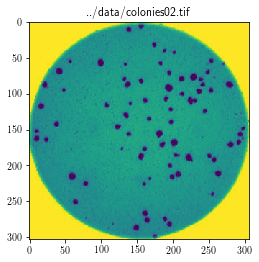

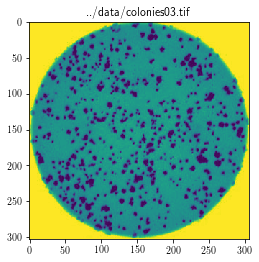

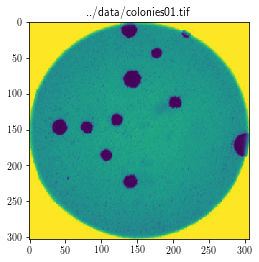

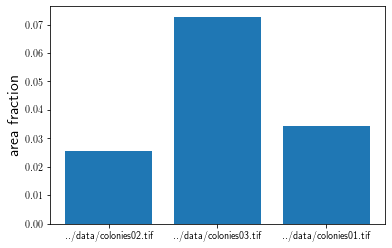

In [5]:
from glob import glob

fnames = glob('../data/colo*')

fractions = []
for name in fnames:
    image = skimage.io.imread(name, as_gray = True)
    plt.figure()
    plt.imshow(image)
    plt.title(name)
    frac = measure_colonies(image)
    fractions.append(frac)
 
print(len(fractions), fnames)
plt.figure()
plt.bar(np.arange(1,4), fractions, tick_label = fnames)
plt.ylabel('area fraction')